In [108]:
import numpy as np
import pandas as pd
from datetime import datetime
import re
import string
import nltk
from nltk.corpus import stopwords;
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize;
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk import pos_tag
from nltk.util import ngrams
import collections
import spacy
en = spacy.load('en_core_web_sm')
import matplotlib.pyplot as plt



In [92]:
new_data=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/extreme right antisemitism _ new.csv")
data=new_data[['Date','Post']]
#data['Date']=data['Date'].apply(lambda x:datetime.strptime(x,'%d/%m/%y').date())


/var/folders/08/6__rzch12ms6qj1p_4ypnr2m0000gn/T/ipykernel_60673/1793289984.py:1: DtypeWarning: Columns (4,5,6,7,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,99,100,102) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data=pd.read_csv("/Users/dhanushkikkisetti/Documents/Research Assistant/extreme right antisemitism _ new.csv")


In [93]:
data.drop_duplicates()

,Date,Post
0,29/12/22,Robber Barons of the Red ShieldThe Rothschild ...
1,18/01/23,Robber Barons of the Red ShieldThe Rothschild ...
2,20/01/23,Page 1 Table of contents : 1. Mayer Amschel ...
3,25/01/23,Page 1 Table of contents : 1. Mayer Amschel ...
4,04/01/23,Page 1 Table of contents : 1. Mayer Amschel ...
...,...,...
38496,21/02/23,#GeorgeSorosWhy Indiaâ€™s Hindu nationalists a...
38497,21/02/23,IF EVERY THING IS CREATED BY ALL POWERFUL BENE...
38498,21/02/23,Ukraine on Fire - Oliver StoneLearn the actual...
38499,21/02/23,GEORGE SOROS SAYS HES THE ONE THAT DECIDED TO ...


In [94]:
data['Post']=data.groupby(['Date'])['Post'].transform(lambda x:' '.join(x))
data=data.drop_duplicates()

/var/folders/08/6__rzch12ms6qj1p_4ypnr2m0000gn/T/ipykernel_60673/2695268126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Post']=data.groupby(['Date'])['Post'].transform(lambda x:' '.join(x))


In [95]:
data=data.iloc[:-1,:]

In [96]:
#Converting into lowercase
data['Text']=data['Post'].apply(lambda x:x.lower())
# Removing punctuation
data['Text']=data['Text'].apply(lambda x:x.translate(str.maketrans('','',string.punctuation)))
data['Text']=data['Text'].apply(lambda x:re.sub('\d','',x))
data['Text']=data['Text'].apply(lambda x:re.sub('[^a-zA-Z]', ' ',x))

data['Text']=data['Text'].apply(lambda x:word_tokenize(x))

In [114]:
def bigstring(text):
    new=[]
    for i in text:
        if len(i)<10:
            new.append(i)
    return new
def remove_stopwords(text):
    stopword=set(stopwords.words('english'))
    modified_text=[]
    for i in text:
        if i not in stopword:
            modified_text.append(i)
    return ' '.join(modified_text)

In [98]:
data['Text']=data['Text'].apply(lambda x:bigstring(x))
data['Text']=data['Text'].apply(lambda x:remove_stopwords(x))
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by="Date")

In [99]:
vectorizer=CountVectorizer(ngram_range=(2,2))
data

,Date,Post,Text
235,2022-12-24,Sandra Bullock - Best Actress @ People's Choic...,sandra bullock best actress peoples choice awa...
378,2022-12-25,>>409632939 Kikes pulled off 1913 because they...,kikes pulled already begins kikes already cont...
513,2022-12-26,https://www.bitchute.com/video/MeqScTqt4zmV/ K...,klaus schwab george soros declare china must l...
262,2022-12-27,I'd like to see her sources. I don't see the s...,id like see sources dont see surname schwab an...
236,2022-12-28,Benjamin Fulford Report: â€œRules Based World ...,benjamin fulford report rules based world orde...
0,2022-12-29,Robber Barons of the Red ShieldThe Rothschild ...,robber barons red shieldthe family top bankers...
8,2022-12-30,Actually I've never bothered to read up and le...,actually ive never bothered read learn soros k...
179,2022-12-31,It's not so simple as this. The Rothschild's a...,simple establish absolute monopoly reserve ban...
260,2023-01-01,>>410435068 A little bit about sir Nathan Mayo...,little bit sir nathan mayor person marx kin al...
191,2023-01-02,Wow! Posted by MSN. Will wonders never cease?#...,wow posted msn wonders never common ground bid...


In [120]:
bigram={}

for i in range(data.shape[0]):
    sentence=data['Text'].iloc[i]
    vectorizer.fit_transform([sentence])
    features=vectorizer.get_feature_names_out()
    for j in features:
        if j not in bigram:
            bigram[j]=0
        else:
            bigram[j]=bigram[j]+1
    
#print("Bigram that appeared on Date ",data['date'].loc[i])
final=sorted(collections.Counter(bigram).items(), key=lambda x:x[1],reverse=True)[:100]
final
 
    

[('bill gates', 59),
 ('deep state', 59),
 ('dont know', 59),
 ('fuck kike', 59),
 ('george soros', 59),
 ('kike faggot', 59),
 ('kike kike', 59),
 ('klaus schwab', 59),
 ('new world', 59),
 ('soros funded', 59),
 ('united states', 59),
 ('world order', 59),
 ('agenda bidenbots', 58),
 ('aka still', 58),
 ('bidenbots chinajoe', 58),
 ('billgates nwo', 58),
 ('bolshevik communist', 58),
 ('buried today', 58),
 ('chinajoe retards', 58),
 ('commie agenda', 58),
 ('communism globohomo', 58),
 ('communist homeland', 58),
 ('communist warpspeed', 58),
 ('cons frauds', 58),
 ('convid maskfree', 58),
 ('day bolshevik', 58),
 ('day local', 58),
 ('expelzog mossad', 58),
 ('frauds marxists', 58),
 ('freedom sheeple', 58),
 ('fucking kike', 58),
 ('fuhq qtards', 58),
 ('globohomo billgates', 58),
 ('godless commie', 58),
 ('gon na', 58),
 ('homeland known', 58),
 ('joe biden', 58),
 ('known ussa', 58),
 ('liberty freedom', 58),
 ('local usa', 58),
 ('looks like', 58),
 ('marxists communism', 58),

In [101]:
vocab=[]
for i in final:
    if i[1]==data.shape[0]-1:
        vocab.append(i[0])
print(vocab)


['bill gates', 'deep state', 'dont know', 'fuck kike', 'george soros', 'kike faggot', 'kike kike', 'klaus schwab', 'new world', 'soros funded', 'united states', 'world order']


In [1]:
def frequency(i,x):
    s=0
    x=x.split(" ")
    pairs=list(zip(x[:-1],x[1:]))
    features=[' '.join(i) for i in pairs]
    for j in features:
        if j==i:
            s+=1
    return s

In [106]:
for i in vocab:
    data[i]=data['Text'].apply(lambda x:frequency(i,x))

In [113]:
data

,Date,Post,Text,bill gates,deep state,dont know,fuck kike,george soros,kike faggot,kike kike,klaus schwab,new world,soros funded,united states,world order
235,2022-12-24,Sandra Bullock - Best Actress @ People's Choic...,sandra bullock best actress peoples choice awa...,4,16,3,2,37,1,3,11,8,4,34,9
378,2022-12-25,>>409632939 Kikes pulled off 1913 because they...,kikes pulled already begins kikes already cont...,3,20,5,4,38,4,5,8,7,4,14,8
513,2022-12-26,https://www.bitchute.com/video/MeqScTqt4zmV/ K...,klaus schwab george soros declare china must l...,16,23,3,4,65,2,6,16,5,3,9,7
262,2022-12-27,I'd like to see her sources. I don't see the s...,id like see sources dont see surname schwab an...,2,14,4,6,71,3,3,6,2,6,7,3
236,2022-12-28,Benjamin Fulford Report: â€œRules Based World ...,benjamin fulford report rules based world orde...,5,30,9,4,85,2,5,9,6,1,7,10
0,2022-12-29,Robber Barons of the Red ShieldThe Rothschild ...,robber barons red shieldthe family top bankers...,4,23,8,8,66,3,3,9,7,4,5,10
8,2022-12-30,Actually I've never bothered to read up and le...,actually ive never bothered read learn soros k...,11,13,5,4,64,1,7,4,4,1,4,5
179,2022-12-31,It's not so simple as this. The Rothschild's a...,simple establish absolute monopoly reserve ban...,12,23,12,9,50,4,5,1,2,2,5,2
260,2023-01-01,>>410435068 A little bit about sir Nathan Mayo...,little bit sir nathan mayor person marx kin al...,9,15,13,6,49,10,2,8,1,2,2,1
191,2023-01-02,Wow! Posted by MSN. Will wonders never cease?#...,wow posted msn wonders never common ground bid...,11,16,4,7,117,5,7,13,8,4,14,7


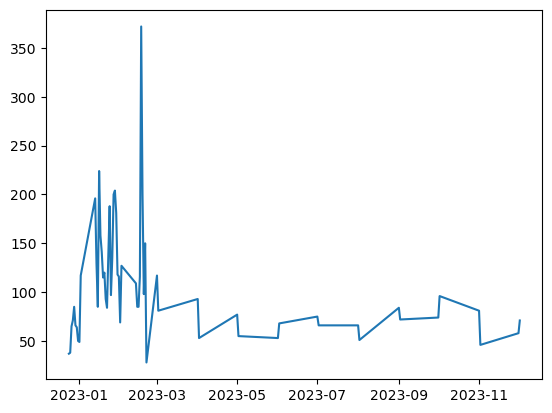

In [118]:
x=list(data['Date'])
y=list(data['george soros'])
fig,ax=plt.subplots()
plt.plot(x,y)